Import packages

In [1]:
from dataretrieval import nwis
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Identify USGS site IDs

In [2]:
siteNumber = ["12305000","06038800"]
parameterCode = "00060" # Discharge
startDate = "1990-10-01"
endDate = "2024-09-30"

Retrive site infomation

In [3]:
site_info = nwis.get_info(sites= siteNumber )

site_info_df = pd.DataFrame( site_info[0] )

print( site_info_df )

#print( site_info_df.columns )

  agency_cd   site_no                                  station_nm site_tp_cd  \
0      USGS  06038800  Madison River at Kirby Ranch nr Cameron MT         ST   
1      USGS  12305000                KOOTENAI RIVER AT LEONIA, ID         ST   

      lat_va     long_va  dec_lat_va  dec_long_va coord_meth_cd  coord_acy_cd  \
0  445319.16  1113451.19   44.888656  -111.580886             N             1   
1  483700.78  1160257.10   48.616883  -116.049194             N             1   

   ... local_time_fg reliability_cd  gw_file_cd  nat_aqfr_cd  aqfr_cd  \
0  ...             Y              C    NYNNNNNN          NaN      NaN   
1  ...             Y              C    NNNNNNNN          NaN      NaN   

  aqfr_type_cd well_depth_va hole_depth_va  depth_src_cd  project_no  
0          NaN           NaN           NaN           NaN         NaN  
1          NaN           NaN           NaN           NaN         NaN  

[2 rows x 42 columns]


Extract stream temp data

In [4]:
parameterCode = "00010" 

dailyStreamtemp = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year

print( dailyStreamtemp_df)

#print( dailyStreamtemp_df.dtypes)
#print( type(dailyStreamtemp_df[["Date"]]) )

        site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
0      06038800 1995-04-12 00:00:00+00:00            5.5                A   
1      06038800 1995-04-13 00:00:00+00:00            6.5                A   
2      06038800 1995-04-14 00:00:00+00:00            6.0                A   
3      06038800 1995-04-15 00:00:00+00:00            6.5                A   
4      06038800 1995-04-16 00:00:00+00:00            6.5                A   
...         ...                       ...            ...              ...   
12896  12305000 2024-09-26 00:00:00+00:00           15.7                P   
12897  12305000 2024-09-27 00:00:00+00:00           14.3                P   
12898  12305000 2024-09-28 00:00:00+00:00           14.1                P   
12899  12305000 2024-09-29 00:00:00+00:00           14.2                P   
12900  12305000 2024-09-30 00:00:00+00:00           13.6                P   

       00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd        Date

Identify the minimum date of stream temp

In [5]:
min_dailyStreamtemp_date = str( dailyStreamtemp_df["Date"].iloc[0] )
print(  
   min_dailyStreamtemp_date 
    
#    min_dailyStreamtemp_date  
)
print( type(  min_dailyStreamtemp_date )    )

1995-04-12
<class 'str'>


extract streamflow data

In [6]:
parameterCode = "00060" 
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start= min_dailyStreamtemp_date , end=endDate) 
#print(dailyStreamflow)
#print( type(dailyStreamflow) )

dailyStreamflow_df = pd.DataFrame( dailyStreamflow[0] )
dailyStreamflow_df =dailyStreamflow_df .reset_index()


# Convert datetime to date (remove the time part)
dailyStreamflow_df['Date'] = dailyStreamflow_df['datetime'].dt.date
dailyStreamflow_df['Month'] = dailyStreamflow_df['datetime'].dt.month
dailyStreamflow_df['Year'] = dailyStreamflow_df['datetime'].dt.year

dailyStreamflow_df = dailyStreamflow_df[ dailyStreamflow_df['Month'].isin( [6,7,8] )    ]

print(dailyStreamflow_df)

        site_no                  datetime  00060_Mean 00060_Mean_cd  \
50     06038800 1995-06-01 00:00:00+00:00      2510.0             A   
51     06038800 1995-06-02 00:00:00+00:00      2570.0             A   
52     06038800 1995-06-03 00:00:00+00:00      2750.0             A   
53     06038800 1995-06-04 00:00:00+00:00      2850.0             A   
54     06038800 1995-06-05 00:00:00+00:00      2870.0             A   
...         ...                       ...         ...           ...   
21495  12305000 2024-08-27 00:00:00+00:00      8580.0             A   
21496  12305000 2024-08-28 00:00:00+00:00      8610.0             A   
21497  12305000 2024-08-29 00:00:00+00:00      8620.0             A   
21498  12305000 2024-08-30 00:00:00+00:00      8590.0             A   
21499  12305000 2024-08-31 00:00:00+00:00      8560.0             A   

             Date  Month  Year  
50     1995-06-01      6  1995  
51     1995-06-02      6  1995  
52     1995-06-03      6  1995  
53     1995-06-

In [7]:


shared_url = "https://drive.google.com/file/d/1LRUPDJx6YCZ9ym6DgYY1eDkmBB8lbgJd/view?usp=share_link"

# Extract the file ID
file_id = shared_url.split('/d/')[1].split('/')[0]

# Create the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a pandas DataFrame
prism_df = pd.read_csv(download_url)

prism_df['date'] = pd.to_datetime( prism_df['date'])

def days_since_october_first(date):
    october_first = pd.Timestamp(year=date.year, month=10, day=1)
    days_difference = (date - october_first).days
    # Adjust for negative values (wrap-around)
    return days_difference if days_difference >= 0 else days_difference + 365

# Apply the function to calculate days since October 1st
prism_df['Days_Since_October_1st'] =  prism_df['date'].apply(days_since_october_first)

prism_df[ "rad_d"   ] = 2 * np.pi * prism_df[ "Days_Since_October_1st"   ] /365

prism_df["site_no"] =prism_df["site_no"].astype(str)

# Add a leading 0 to strings with exactly 7 characters
prism_df['site_no'] = prism_df['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)

prism_df["site_no"] =prism_df["site_no"].astype(str)

print( prism_df)

print( prism_df.dtypes )

print(  prism_df["site_no"].unique()  )

print(siteNumber)

            date      tmean   site_no  Days_Since_October_1st     rad_d
0     2012-01-14  -0.644000  12305000                     104  1.790277
1     2012-01-15  -4.775000  12305000                     105  1.807492
2     2012-01-16  -6.063000  12305000                     106  1.824706
3     2012-01-17  -5.317000  12305000                     107  1.841920
4     2012-01-18  -9.106001  12305000                     108  1.859134
...          ...        ...       ...                     ...       ...
15533 2024-10-10  10.007200  06038800                       9  0.154928
15534 2024-10-11   8.662700  06038800                      10  0.172142
15535 2024-10-12   9.974999  06038800                      11  0.189356
15536 2024-10-13  11.141400  06038800                      12  0.206570
15537 2024-10-14  13.207850  06038800                      13  0.223785

[15538 rows x 5 columns]
date                      datetime64[ns]
tmean                            float64
site_no                     

12305000
<class 'str'>
           date      tmean   site_no  Days_Since_October_1st     rad_d  \
0    2012-01-14  -0.644000  12305000                     104  1.790277   
1    2012-01-15  -4.775000  12305000                     105  1.807492   
2    2012-01-16  -6.063000  12305000                     106  1.824706   
3    2012-01-17  -5.317000  12305000                     107  1.841920   
4    2012-01-18  -9.106001  12305000                     108  1.859134   
...         ...        ...       ...                     ...       ...   
4653 2024-10-10  10.007200  12305000                       9  0.154928   
4654 2024-10-11   8.662700  12305000                      10  0.172142   
4655 2024-10-12   9.974999  12305000                      11  0.189356   
4656 2024-10-13  11.141400  12305000                      12  0.206570   
4657 2024-10-14  13.207850  12305000                      13  0.223785   

      sin_rday  cos_rday  
0     0.976011 -0.217723  
1     0.972118 -0.234491  
2     0

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_72088/678836655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_72088/678836655.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_72088/678836655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

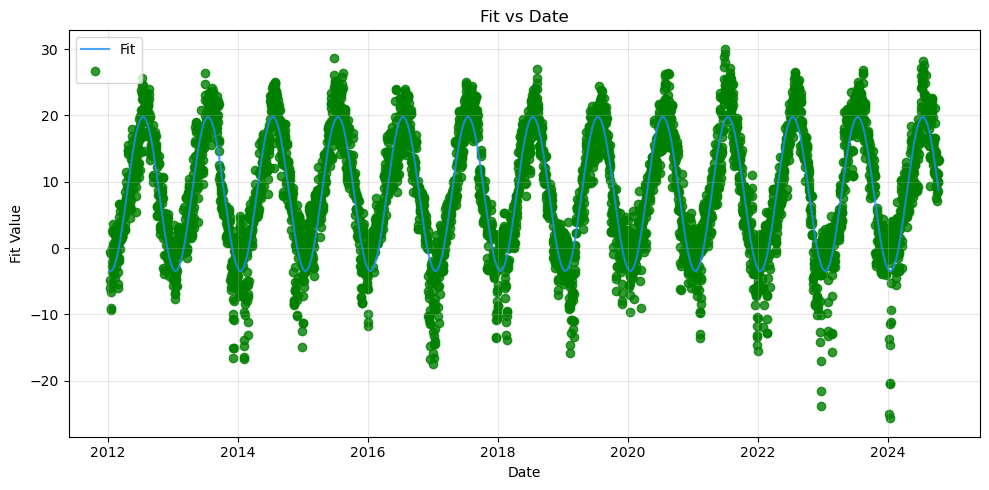

dailyStreamtemp_df2:         site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
8485   12305000 2011-09-30 00:00:00+00:00           14.4                A   
8486   12305000 2011-10-01 00:00:00+00:00           15.5                A   
8487   12305000 2011-10-02 00:00:00+00:00           15.5                A   
8488   12305000 2011-10-03 00:00:00+00:00           15.5                A   
8489   12305000 2011-10-04 00:00:00+00:00           14.5                A   
...         ...                       ...            ...              ...   
12896  12305000 2024-09-26 00:00:00+00:00           15.7                P   
12897  12305000 2024-09-27 00:00:00+00:00           14.3                P   
12898  12305000 2024-09-28 00:00:00+00:00           14.1                P   
12899  12305000 2024-09-29 00:00:00+00:00           14.2                P   
12900  12305000 2024-09-30 00:00:00+00:00           13.6                P   

       00010_Minimum 00010_Minimum_cd  00010_Mean 0001

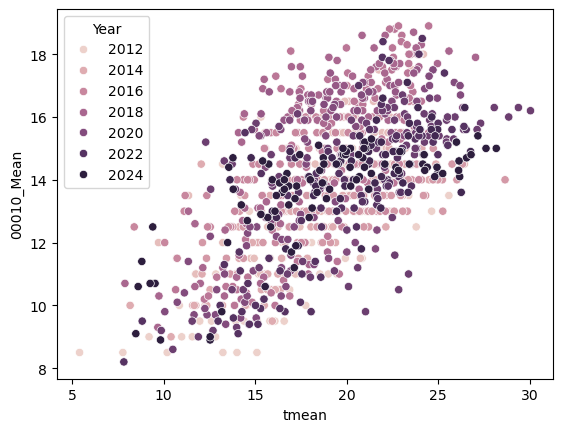

<Figure size 800x600 with 0 Axes>

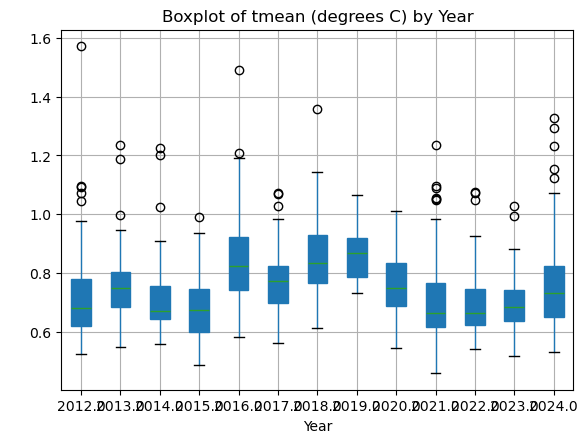

Year
2012.0    0.681243
2013.0    0.750402
2014.0    0.672579
2015.0    0.675250
2016.0    0.824091
2017.0    0.771964
2018.0    0.834855
2019.0    0.867396
2020.0    0.751100
2021.0    0.664454
2022.0    0.664949
2023.0    0.684794
2024.0    0.731873
Name: w_a, dtype: float64
Year
1995    4580.0
1996    7475.0
1997    7850.0
1998    4570.0
1999    6395.0
2000    5620.0
2001    3165.0
2002    7310.0
2003    7225.0
2004    6820.0
2005    7230.0
2006    8885.0
2007    7170.0
2008    6195.0
2009    4835.0
2010    5645.0
2011    8405.0
2012    7845.0
2013    6045.0
2014    6435.0
2015    5155.0
2016    4405.0
2017    6125.0
2018    6450.0
2019    4740.0
2020    6285.0
2021    4375.0
2022    6770.0
2023    6035.0
2024    5205.0
Name: 00060_Mean, dtype: float64
             w_a  00060_Mean     log_Q
Year                                  
2012.0  0.681243      7845.0  8.967632
2013.0  0.750402      6045.0  8.706987
2014.0  0.672579      6435.0  8.769507
2015.0  0.675250      5155.0  8.547722


/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_72088/678836655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_72088/678836655.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )
/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_72088/678836655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

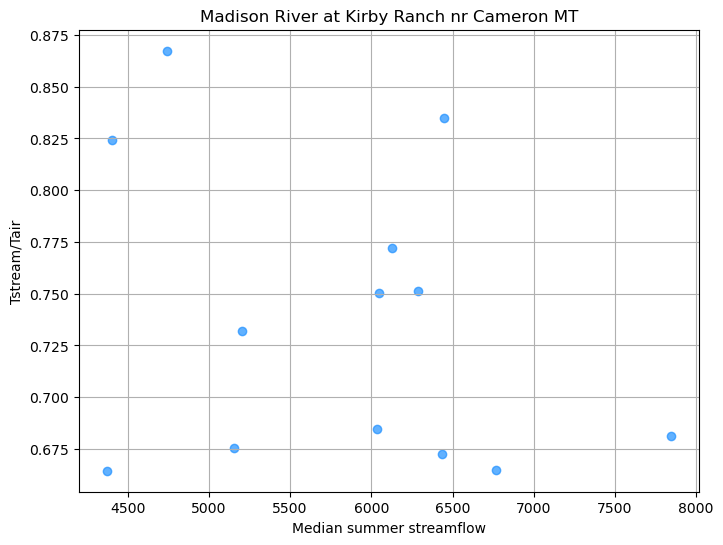

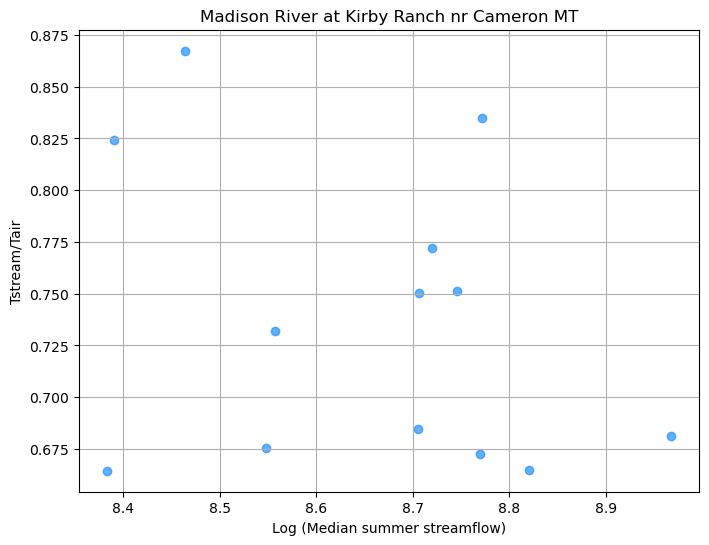

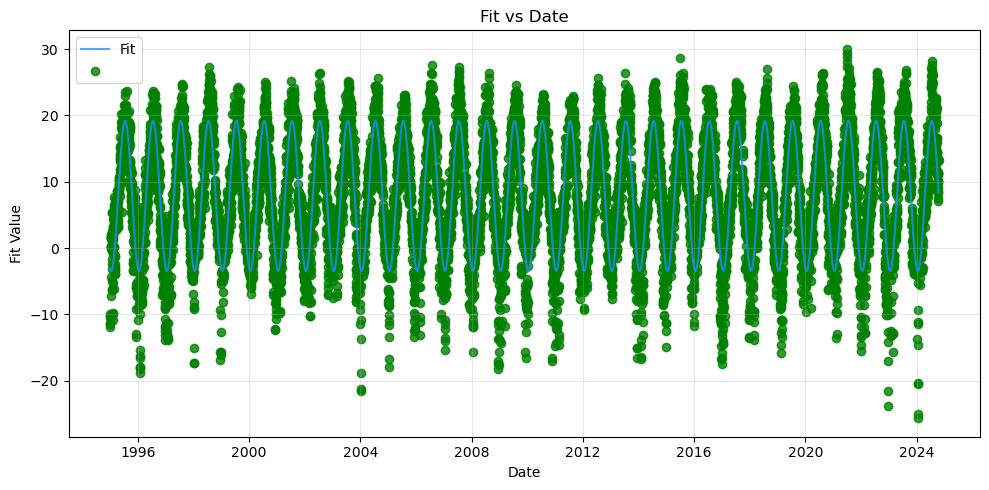

dailyStreamtemp_df2:        site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
0     06038800 1995-04-12 00:00:00+00:00            5.5                A   
1     06038800 1995-04-13 00:00:00+00:00            6.5                A   
2     06038800 1995-04-14 00:00:00+00:00            6.0                A   
3     06038800 1995-04-15 00:00:00+00:00            6.5                A   
4     06038800 1995-04-16 00:00:00+00:00            6.5                A   
...        ...                       ...            ...              ...   
8480  06038800 2024-09-26 00:00:00+00:00           16.8                A   
8481  06038800 2024-09-27 00:00:00+00:00           17.1                A   
8482  06038800 2024-09-28 00:00:00+00:00           17.3                A   
8483  06038800 2024-09-29 00:00:00+00:00           16.6                A   
8484  06038800 2024-09-30 00:00:00+00:00           14.4                A   

      00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd    

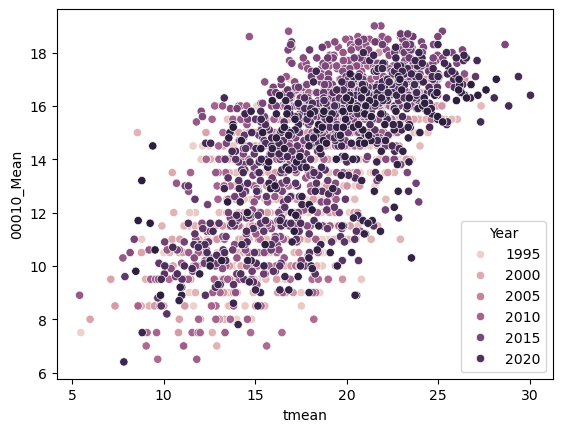

<Figure size 800x600 with 0 Axes>

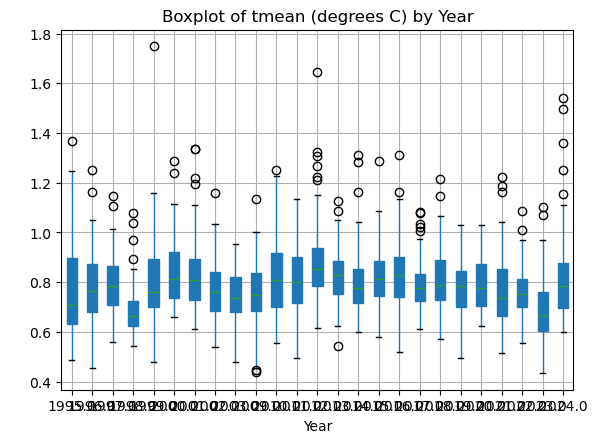

Year
1995.0    0.709446
1996.0    0.765682
1997.0    0.784062
1998.0    0.665543
1999.0    0.761451
2000.0    0.812372
2001.0    0.810655
2002.0    0.759674
2003.0    0.738389
2009.0    0.747654
2010.0    0.810540
2011.0    0.799253
2012.0    0.854916
2013.0    0.830048
2014.0    0.776253
2015.0    0.813285
2016.0    0.828406
2017.0    0.778466
2018.0    0.788774
2019.0    0.785710
2020.0    0.777375
2021.0    0.736185
2022.0    0.751155
2023.0    0.669392
2024.0    0.785558
Name: w_a, dtype: float64
Year
1995    4580.0
1996    7475.0
1997    7850.0
1998    4570.0
1999    6395.0
2000    5620.0
2001    3165.0
2002    7310.0
2003    7225.0
2004    6820.0
2005    7230.0
2006    8885.0
2007    7170.0
2008    6195.0
2009    4835.0
2010    5645.0
2011    8405.0
2012    7845.0
2013    6045.0
2014    6435.0
2015    5155.0
2016    4405.0
2017    6125.0
2018    6450.0
2019    4740.0
2020    6285.0
2021    4375.0
2022    6770.0
2023    6035.0
2024    5205.0
Name: 00060_Mean, dtype: float64
      

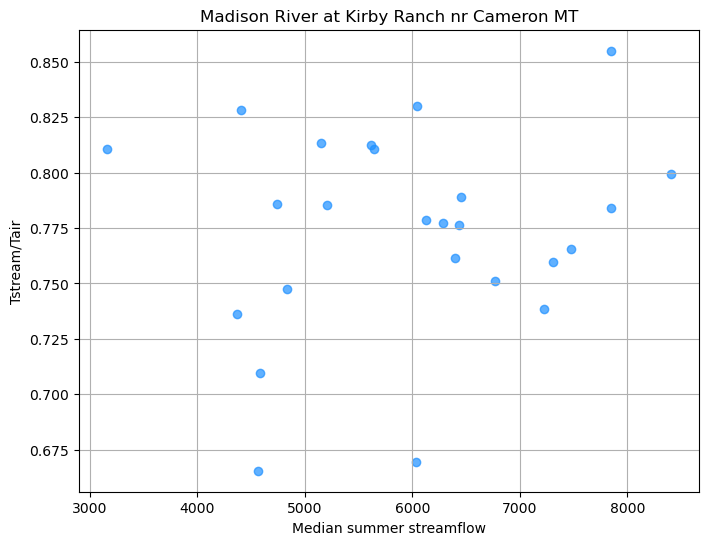

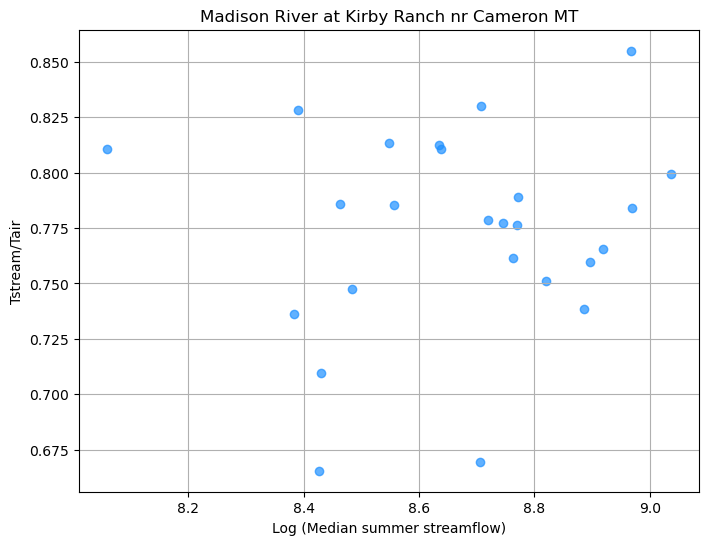

In [9]:
for site in siteNumber: # prism_df["site_no"].unique(): #
    print(site)
    print( type(site) ) 

    prism_df2 = prism_df[prism_df["site_no"] == site ]

    prism_df2['sin_rday'] = np.sin( prism_df2['rad_d'] )
    prism_df2['cos_rday'] = np.cos( prism_df2['rad_d'] )

    print( prism_df2   )
    
# Fit the linear regression model
    model = smf.ols('tmean ~ sin_rday + cos_rday', data= prism_df2 ).fit()
    prism_df2['fit'] = model.predict( prism_df2 )
# Print the summary of the model
    print(model.summary())

    plt.figure(figsize=(10, 5))
    plt.plot( prism_df2['date'],  prism_df2['fit'], label='Fit', color='dodgerblue', alpha=0.8)
    plt.scatter( prism_df2['date'],  prism_df2['tmean'], label=' ', color='green', alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Fit Value')
    plt.title('Fit vs Date')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    dailyStreamtemp_df['Date'] = pd.to_datetime( dailyStreamtemp_df['Date'])
    dailyStreamtemp_df["site_no"] = dailyStreamtemp_df["site_no"].astype(str)
    dailyStreamtemp_df2=dailyStreamtemp_df[ dailyStreamtemp_df['site_no'] == site        ]
    print(     "dailyStreamtemp_df2:",    dailyStreamtemp_df2 )
    merged_df = pd.merge( prism_df2,  dailyStreamtemp_df2,     left_on='date', right_on='Date',  how='outer')
    merged_df = merged_df[ merged_df['Month'].isin( [6,7,8] )    ]
    print( merged_df.head()         )

    sns.scatterplot(data= merged_df,  x='tmean', y='00010_Mean', hue='Year')
    merged_df["w_a"] = merged_df["00010_Mean"]/merged_df["tmean"]
    #merged_df["w_a"] 
    plt.figure(figsize=(8, 6))
    merged_df.boxplot(column="w_a", by='Year', patch_artist=True)

# Set plot title and labels
    plt.title('Boxplot of tmean (degrees C) by Year')
    plt.suptitle('')  # To remove the default "Boxplot" title
    plt.xlabel('Year')
    plt.ylabel(' ')

# Show the plot
    plt.show()

    median_buffer = merged_df.groupby('Year')["w_a"].median()


    print(median_buffer)

    median_Q = dailyStreamflow_df.groupby('Year')["00060_Mean"].median()


    print(median_Q)

    Q_buffer = pd.merge( median_buffer,  median_Q, on='Year')

    Q_buffer["log_Q"] =np.log(    Q_buffer["00060_Mean"] )
    
    print( Q_buffer)

    plt.figure(figsize=(8, 6))
    plt.scatter(    Q_buffer['00060_Mean'], Q_buffer['w_a'], color='dodgerblue', alpha=0.7)
    plt.title(  site_info_df['station_nm'][0] )
    plt.xlabel('Median summer streamflow')
    plt.ylabel('Tstream/Tair')
    plt.grid(True)

    plt.figure(figsize=(8, 6))
    plt.scatter(    Q_buffer['log_Q'], Q_buffer['w_a'], color='dodgerblue', alpha=0.7)
    plt.title(  site_info_df['station_nm'][0] )
    plt.xlabel('Log (Median summer streamflow)')
    plt.ylabel('Tstream/Tair')
    plt.grid(True)
    